In [1]:
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

In [2]:
def read_csv_for_water_year(csv_dir, basin_id, start_date):
    # Determine the water year based on the start date
    start_datetime = datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S")
    water_year = start_datetime.year if start_datetime.month < 10 else start_datetime.year + 1

    # Read the specific CSV file for the determined water year
    file_path = os.path.join(csv_dir, f"{basin_id}_1980_to_2024_agg_rounded_WR{water_year}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, parse_dates=['time'])
        return df
    else:
        raise FileNotFoundError(f"No CSV file found for basin ID {basin_id} and water year {water_year}.")

def isolate_basin_data(ds, basin_id):
    # Isolate the data for the specified basin_id
    if basin_id not in ds['basin'].values:
        raise KeyError(f"Basin ID {basin_id} not found in the NetCDF file.")
    return ds.sel(basin=basin_id)

def plot_time_series(csv_data, netcdf_data, basin_id, start_date, num_hours):
    # Filter data for the specified time range
    start_datetime = datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S")
    end_datetime = start_datetime + timedelta(hours=num_hours)
    
    # Ensure the time range does not exceed the current water year
    end_of_water_year = datetime(start_datetime.year if start_datetime.month < 10 else start_datetime.year + 1, 9, 30, 23, 59, 59)
    if end_datetime > end_of_water_year:
        end_datetime = end_of_water_year

    csv_filtered = csv_data[(csv_data['time'] >= start_datetime) & (csv_data['time'] <= end_datetime)]
    netcdf_filtered = netcdf_data.sel(date=slice(start_datetime, end_datetime))

    # Plot the time series
    plt.figure(figsize=(6, 5))

    plt.plot(csv_filtered['time'], csv_filtered['APCP_surface'], label='APCP_surface (AORC)')
    plt.plot(netcdf_filtered['date'].values, netcdf_filtered['total_precipitation'].values, label='total_precipitation (NLDAS)')
    
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.title(f'Time Series of Precipitation for Basin {basin_id}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()


In [3]:
# Define file paths and parameters
csv_dir = '/home/jmframe/data/CAMELS_US/wood_july2024/1980_to_2024/post_processed/water_years'
netcdf_file = '/home/jmframe/data/CAMELS_US/hourly/usgs-streamflow-nldas_hourly.nc'
start_date = '2000-01-01 00:00:00'
num_hours = 240
num_random_basins = 15

In [4]:
# Read the NetCDF data once
netcdf_data = xr.open_dataset(netcdf_file)

# List of basin IDs from the NetCDF file
basin_ids = netcdf_data['basin'].values

Plotting for Basin ID: 04185000


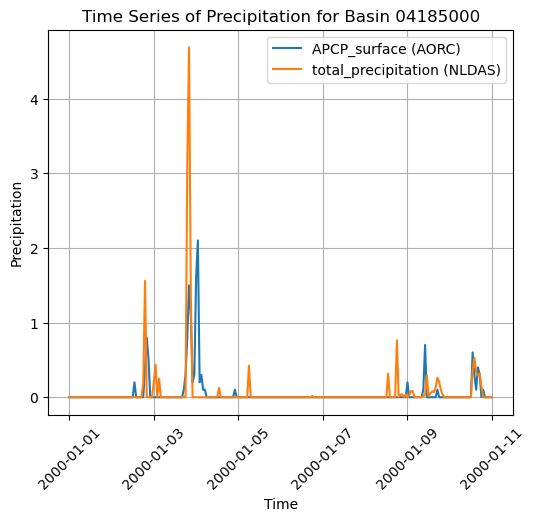

Plotting for Basin ID: 14305500


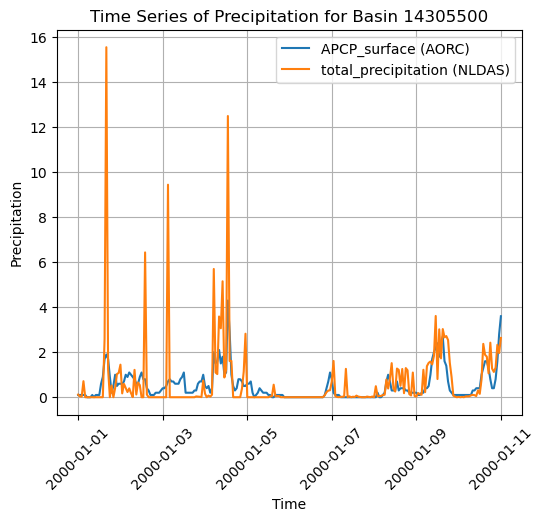

Plotting for Basin ID: 04027000


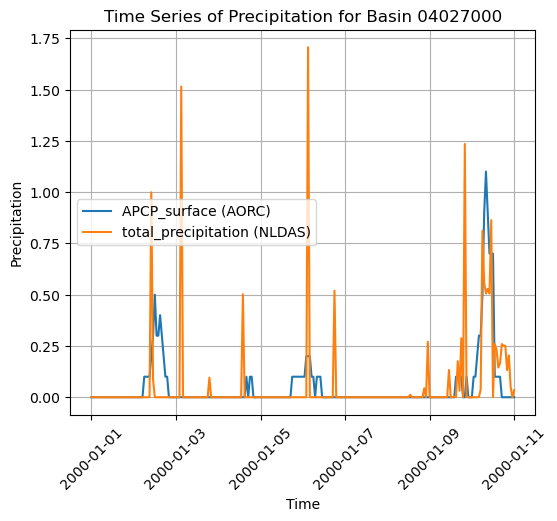

Plotting for Basin ID: 11475560


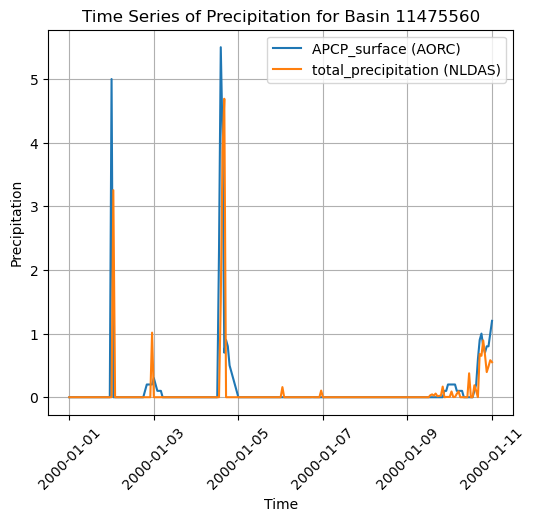

Plotting for Basin ID: 02178400


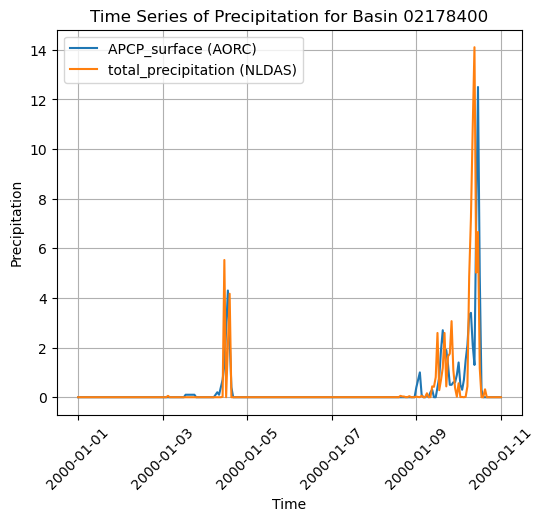

Plotting for Basin ID: 02015700


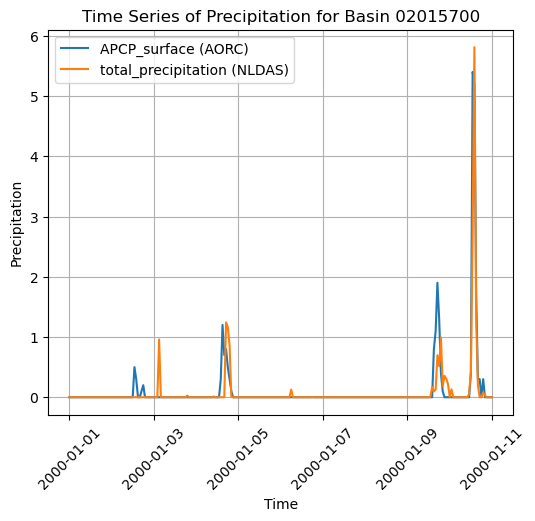

Plotting for Basin ID: 01187300


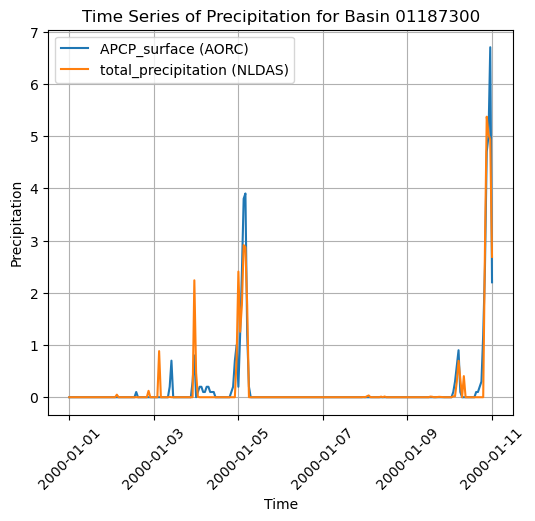

Plotting for Basin ID: 01435000


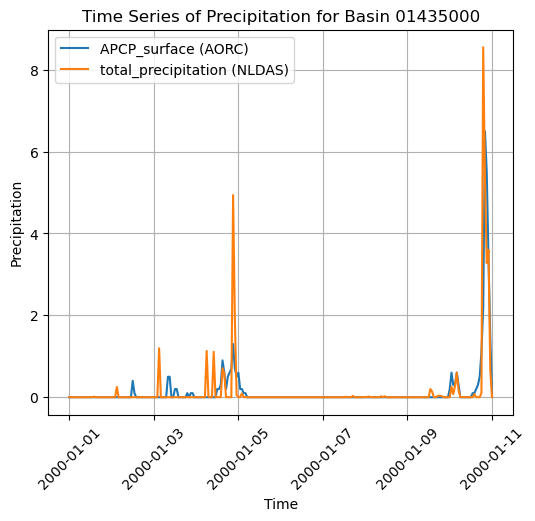

Plotting for Basin ID: 03070500


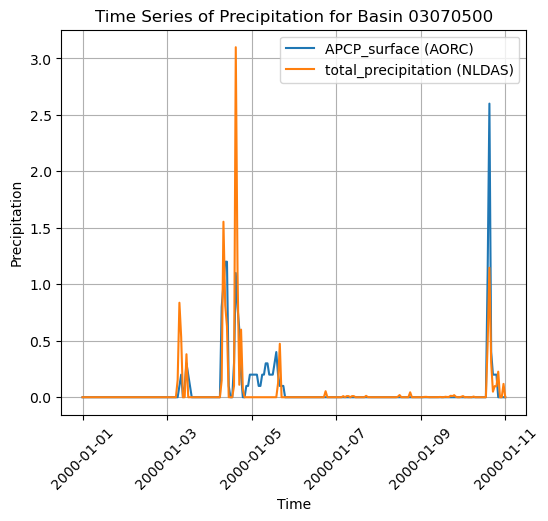

Plotting for Basin ID: 06409000


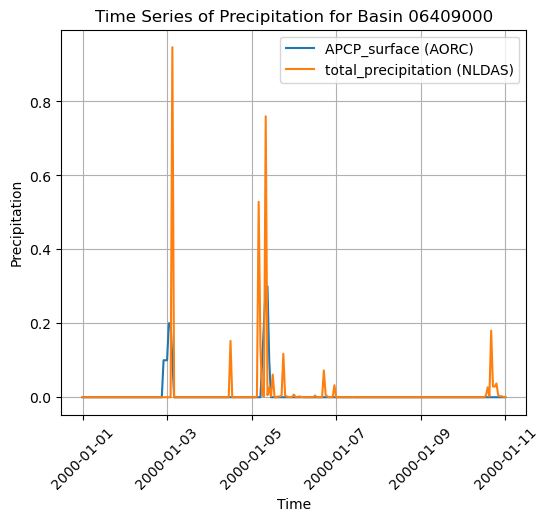

Plotting for Basin ID: 01544500


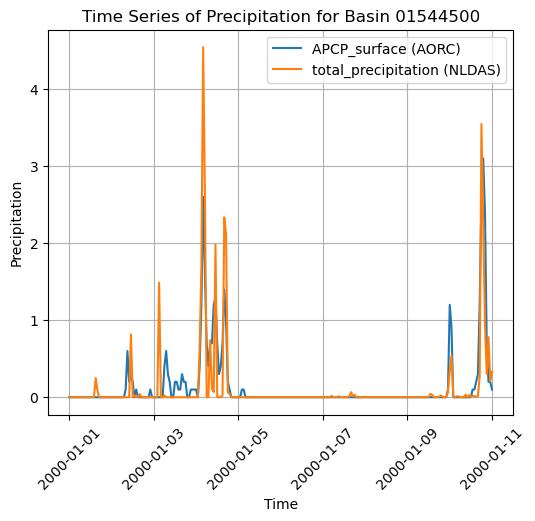

Plotting for Basin ID: 01181000


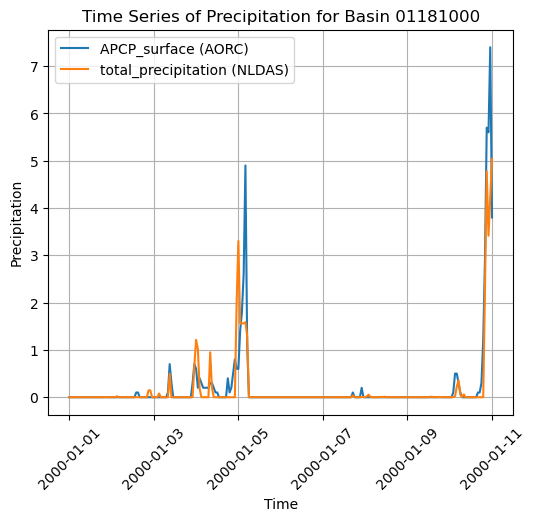

Plotting for Basin ID: 01644000


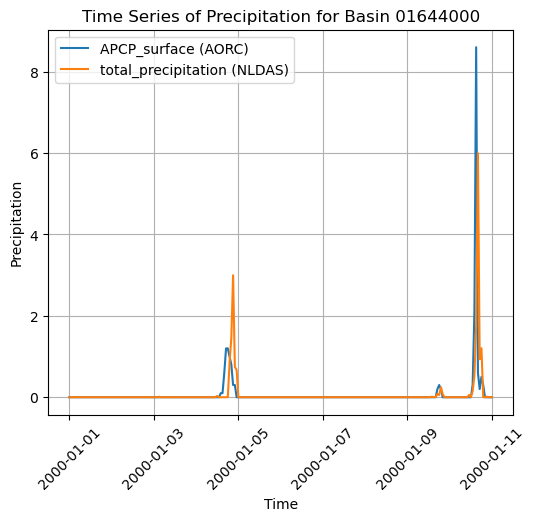

Plotting for Basin ID: 08070000


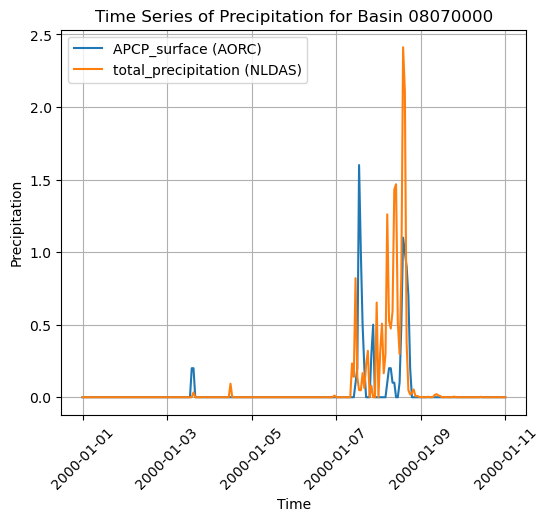

Plotting for Basin ID: 06404000


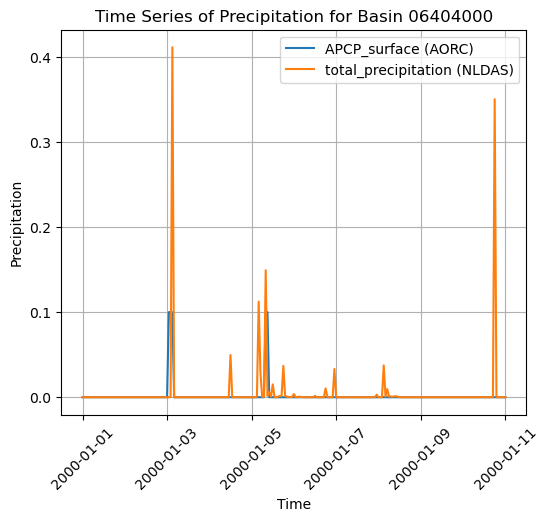

In [5]:
# Loop to plot time series for a specified number of random basins
for _ in range(num_random_basins):
    basin_id = random.choice(basin_ids)
    print(f"Plotting for Basin ID: {basin_id}")

    try:
        # Read the CSV data for the selected basin and start date
        csv_data = read_csv_for_water_year(csv_dir, basin_id, start_date)

        # Isolate the NetCDF data for the selected basin
        isolated_netcdf_data = isolate_basin_data(netcdf_data, basin_id)

        # Plot the time series
        plot_time_series(csv_data, isolated_netcdf_data, basin_id, start_date, num_hours)
    except FileNotFoundError as e:
        print(e)
    except KeyError as e:
        print(e)